In [5]:
from pyspark import SparkConf, SparkContext
import os
conf = SparkConf().setMaster('local').setAppName('book')
sc = SparkContext(conf = conf).getOrCreate()
sc

<SparkContext master=local appName=book>

In [9]:
direct = os.path.join(os.getcwd(), 'data')
file_name = 'Book'
file_path = os.path.join(direct, file_name)
file_path

'/home/lab17/git/src/data/Book'

In [12]:
data = sc.textFile('file:///' + file_path.replace('\\','/'))
data

file:////home/lab17/git/src/data/Book MapPartitionsRDD[3] at textFile at NativeMethodAccessorImpl.java:0

In [16]:
data.take(20)

['Self-Employment: Building an Internet Business of One',
 'Achieving Financial and Personal Freedom through a Lifestyle Technology Business',
 'By Frank Kane',
 '',
 '',
 '',
 'Copyright � 2015 Frank Kane. ',
 'All rights reserved worldwide.',
 '',
 '',
 'CONTENTS',
 'Disclaimer',
 'Preface',
 'Part I: Making the Big Decision',
 'Overcoming Inertia',
 'Fear of Failure',
 'Career Indoctrination',
 'The Carrot on a Stick',
 'Ego Protection',
 'Your Employer as a Security Blanket']

In [21]:
#단어 목록(띄어쓰기 기준)
map_words = data.map(lambda x : x.split( ))
map_words.take(10)

[['Self-Employment:', 'Building', 'an', 'Internet', 'Business', 'of', 'One'],
 ['Achieving',
  'Financial',
  'and',
  'Personal',
  'Freedom',
  'through',
  'a',
  'Lifestyle',
  'Technology',
  'Business'],
 ['By', 'Frank', 'Kane'],
 [],
 [],
 [],
 ['Copyright', '�', '2015', 'Frank', 'Kane.'],
 ['All', 'rights', 'reserved', 'worldwide.'],
 [],
 []]

In [60]:
words = data.flatMap(lambda x : x.split())
wordCounts = words.countByValue()
wordCounts

defaultdict(int,
            {'Self-Employment:': 1,
             'Building': 5,
             'an': 172,
             'Internet': 13,
             'Business': 19,
             'of': 941,
             'One': 12,
             'Achieving': 1,
             'Financial': 3,
             'and': 901,
             'Personal': 3,
             'Freedom': 7,
             'through': 55,
             'a': 1148,
             'Lifestyle': 5,
             'Technology': 2,
             'By': 9,
             'Frank': 10,
             'Kane': 7,
             'Copyright': 1,
             '�': 174,
             '2015': 3,
             'Kane.': 1,
             'All': 13,
             'rights': 3,
             'reserved': 2,
             'worldwide.': 2,
             'CONTENTS': 1,
             'Disclaimer': 1,
             'Preface': 1,
             'Part': 2,
             'I:': 2,
             'Making': 5,
             'the': 1176,
             'Big': 1,
             'Decision': 1,
             'Overcoming'

In [66]:
wordCounts.items()

dict_items([('Self-Employment:', 1), ('Building', 5), ('an', 172), ('Internet', 13), ('Business', 19), ('of', 941), ('One', 12), ('Achieving', 1), ('Financial', 3), ('and', 901), ('Personal', 3), ('Freedom', 7), ('through', 55), ('a', 1148), ('Lifestyle', 5), ('Technology', 2), ('By', 9), ('Frank', 10), ('Kane', 7), ('Copyright', 1), ('�', 174), ('2015', 3), ('Kane.', 1), ('All', 13), ('rights', 3), ('reserved', 2), ('worldwide.', 2), ('CONTENTS', 1), ('Disclaimer', 1), ('Preface', 1), ('Part', 2), ('I:', 2), ('Making', 5), ('the', 1176), ('Big', 1), ('Decision', 1), ('Overcoming', 1), ('Inertia', 1), ('Fear', 1), ('Failure', 1), ('Career', 1), ('Indoctrination', 2), ('The', 88), ('Carrot', 1), ('on', 399), ('Stick', 2), ('Ego', 1), ('Protection', 1), ('Your', 62), ('Employer', 2), ('as', 297), ('Security', 2), ('Blanket', 1), ('Why', 3), ('it�s', 28), ('Worth', 1), ('it', 311), ('Unlimited', 2), ('Growth', 4), ('Potential', 1), ('Investing', 3), ('in', 552), ('Yourself,', 1), ('Not', 

In [72]:
stop_words = {"0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"}

In [73]:
# dictionary에서 아이템 꺼내기
filtered_word_counts = {i:j for i,j in wordCounts.items() if i.lower() not in stop_words and len(i) > 2}
filtered_word_counts

{'Self-Employment:': 1,
 'Building': 5,
 'Internet': 13,
 'Business': 19,
 'Achieving': 1,
 'Financial': 3,
 'Personal': 3,
 'Freedom': 7,
 'Lifestyle': 5,
 'Technology': 2,
 'Frank': 10,
 'Kane': 7,
 'Copyright': 1,
 '2015': 3,
 'Kane.': 1,
 'rights': 3,
 'reserved': 2,
 'worldwide.': 2,
 'CONTENTS': 1,
 'Disclaimer': 1,
 'Preface': 1,
 'Making': 5,
 'Big': 1,
 'Decision': 1,
 'Overcoming': 1,
 'Inertia': 1,
 'Fear': 1,
 'Failure': 1,
 'Career': 1,
 'Indoctrination': 2,
 'Carrot': 1,
 'Stick': 2,
 'Ego': 1,
 'Protection': 1,
 'Employer': 2,
 'Security': 2,
 'Blanket': 1,
 'it�s': 28,
 'Worth': 1,
 'Unlimited': 2,
 'Growth': 4,
 'Potential': 1,
 'Investing': 3,
 'Yourself,': 1,
 'Dependencies': 1,
 'Commute': 1,
 'Live': 3,
 'Work': 4,
 'Self-Employment': 1,
 'You?': 1,
 'Flowchart:': 1,
 'Self-Employment?': 2,
 'Safety': 2,
 'Net': 2,
 'Planning': 3,
 'Health': 2,
 'Care': 2,
 'Self-Assessment': 1,
 'Quiz': 1,
 'II:': 2,
 'Happen': 1,
 'Designing': 1,
 'Fallacy': 1,
 'Introducing': 1,

### 워드 클라우드 만들기

In [47]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [70]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

### 시각화

In [80]:
# 상위 20개 count
top_words = sorted(filtered_word_counts.items(), key = lambda x:x[1], reverse = True)[:21]
top_words

word_list = [x for x,y in top_words]
word_counts_list = [y for x, y in top_words]

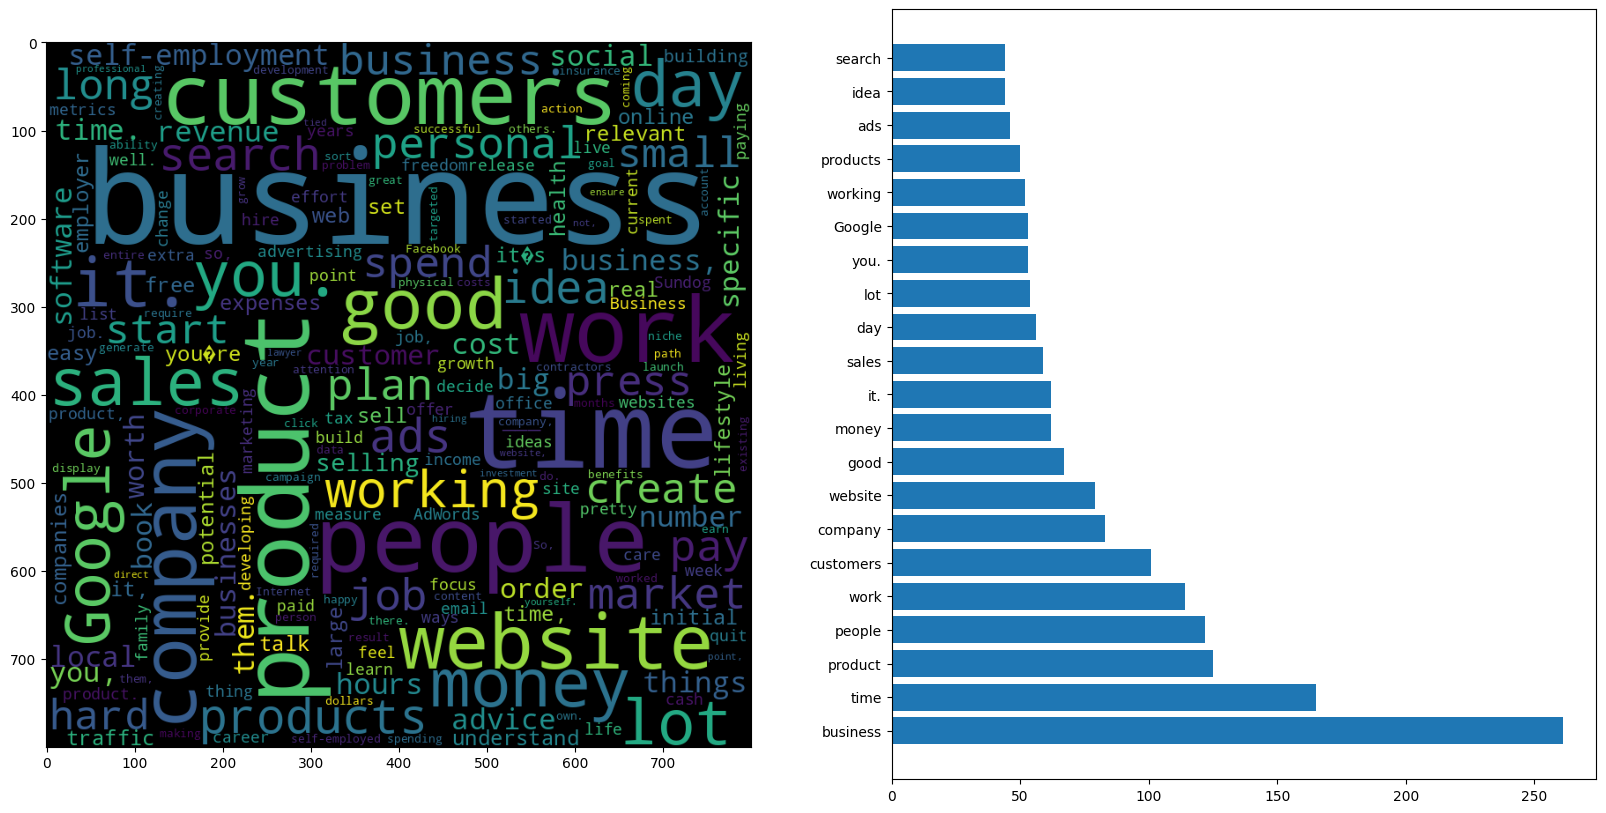

In [92]:
plt.figure(figsize=(20,10))
axes1 = plt.subplot(1,2,1)
axes2 = plt.subplot(1,2,2)

wc = WordCloud(width = 800, height = 800).generate_from_frequencies(filtered_word_counts) #generate_from_frequencies = 빈도수를 통해서 생성한다
axes1.imshow(wc) #image-show라고 함수 외우면 될듯

axes2.barh(word_list, word_counts_list)

plt.show()

In [93]:
sc.stop()